## Introduction

## Entropy as a Measure of Uncertainty

## Kullback-Leibler Divergence: The Distance Between Probability Density Functions

## Cross Entropy and its Relationship to KL Divergence

## Cross Entropy as a Cost Function in Machine Learning

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import string as string
import pprint

In [406]:
pp = pprint.PrettyPrinter(indent=4)

In [407]:
def entropy(p,eps):
    p = p+eps
    return -np.dot(p,np.log2(p))

In [408]:
def cross_entropy(p,q,eps):
    q = q+eps
    return -np.dot(p,np.log(q))

In [409]:
def kullback_leibler(p,q,eps):
    p = p+eps; q = q+eps
    return -np.dot(p,np.log(p/q))

In [410]:
eps = 1e-15

In [411]:
nel = 100
p_list = np.linspace(0,1,nel+1)
p_set = [np.array([p, 1-p]) for p in p_list]
Hp = [entropy(value,eps) for value in p_set]
dic = {'P(x=1)':p_list, 'Hp':Hp}

Text(0.5, 1.0, 'Binary Entropy')

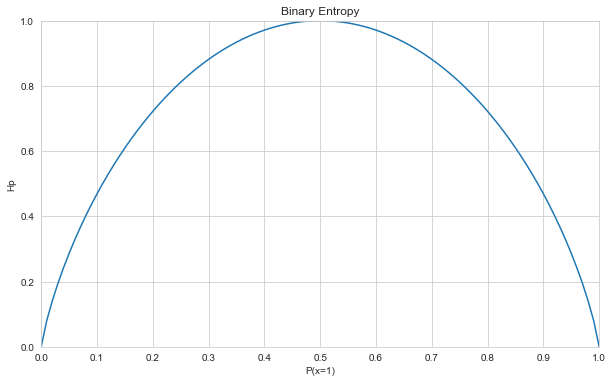

In [412]:
dfentropy = pd.DataFrame(dic)
sns.set_style("whitegrid")
fig_dims = (10, 6)
fig,ax = plt.subplots(figsize=fig_dims)
ax.set(xlim=(0,1), ylim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="Hp", ax=ax, data=dfentropy)
plt.title('Binary Entropy')

In [413]:
p = np.random.rand(10)
p /= p.sum()
cats = list(string.ascii_lowercase[:len(p)])
dic = {'Category':cats, 'Probability':p}
dist = pd.DataFrame(dic)

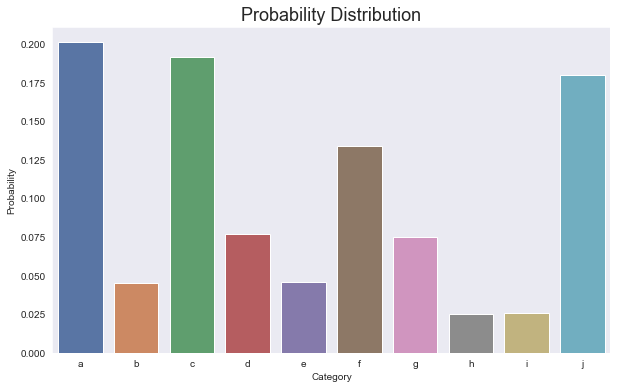

In [414]:
sns.set_style("dark")
fig_dims = (10, 6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

Writing a similar distribution to $\mathbf{p}$. Let us call it $\mathbf{q}$

In [415]:
q = p.copy()

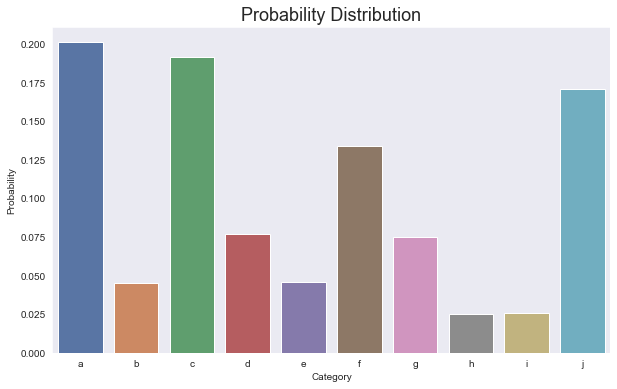

In [416]:
q[-1] = 0.95*p[-1]
dic = {'Category':cats, 'Probability':q}
dist = pd.DataFrame(dic)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

Let us compute now the entropy of each distribution and their cross entropy

In [417]:
entropy(p,eps)

2.994920182464255

In [418]:
entropy(q,eps)

2.985303416879381

In [419]:
H_pq = cross_entropy(p,q,eps)
print(H_pq)

2.0851382140226162


Now choosing a completely random $\mathbf{q}$

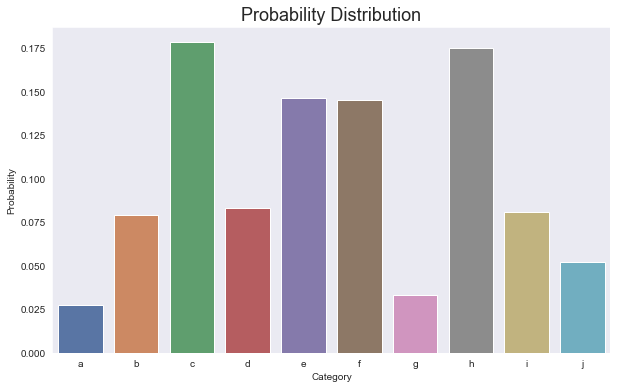

In [420]:
q = np.random.rand(10)
q = q/q.sum()
dic = {'Category':cats, 'Probability':q}
dist = pd.DataFrame(dic)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

In [421]:
H_pq = cross_entropy(p,q,eps)
print(H_pq)

2.600683309875633


Now let us say that we use the Cross Entropy for the classification problem

The category $a$ is going to be chosen for RV $T$

In [422]:
q = np.zeros(10)
q[0] = 1
pp.pprint(q)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [423]:
cross_entropy(p,q,eps)

27.591627254821187

If $\mathbf{p}$ were close to $\mathbf{q}$, then

In [424]:
p = np.array([0.985, 0.015, 0, 0, 0, 0, 0, 0, 0, 0])

In [425]:
cross_entropy(p,q,eps)

0.5180816459236591

In [426]:
nel = 99
p_list = np.linspace(0, 0.99, nel+1)
N = 8
p_set = [np.pad([p,1-p], (0,N), 'constant', constant_values=0) for p in p_list]
H_pq = [cross_entropy(value,q,eps) for value in p_set]
KL = [kullback_leibler(value,q,eps) for value in p_set]
dic_pq = {'P(x=1)':p_list, 'H_pq':H_pq}
dic_KL = {'P(x=1)':p_list, 'KL':KL}

Text(0.5, 1.0, 'Kullback-Leibler')

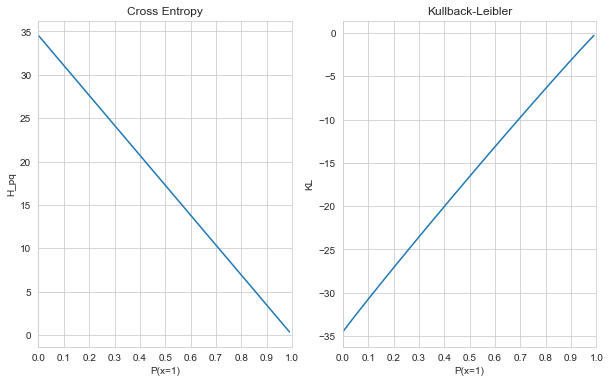

In [427]:
dfcross_entropy = pd.DataFrame(dic_pq)
dfkullback_leibler = pd.DataFrame(dic_KL)
sns.set_style("whitegrid")
fig_dims = (10, 6)
fig,ax =plt.subplots(1,2,figsize=fig_dims)
ax[0].set(xlim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="H_pq", data=dfcross_entropy, ax=ax[0])
ax[0].set_title('Cross Entropy')
ax[1].set(xlim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="KL", data=dfkullback_leibler, ax=ax[1])
ax[1].set_title('Kullback-Leibler')

In [428]:
dfcross_entropy.head()

,P(x=1),H_pq
0,0.00,34.538776
1,0.01,34.193389
2,0.02,33.848001
3,0.03,33.502613
4,0.04,33.157225
